<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Python%20SKLearn/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Iris Dataset from SKLearn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn import datasets
from sklearn.svm import SVC


In [4]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Load selected setosa and versicolor data in to variables X, y

In [6]:
X = iris.data[:, (2,3)] #extract petal width/length data
y = iris.target

setosa_or_versicolor = ( y == 0 ) | ( y == 1 )

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Train an SVM model with a linear kernel. This means that the decision boundary will be linear. C = infity translates to no regularization. The range of C is [0,infty). It functions like the reciporcal of lambda, the regularization term for the l2 cost function.

In [7]:
svm_clf = SVC(C=float("inf"), kernel='linear')
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

Manually plot decision boundary. We'll turn it into a function in the next section of code.

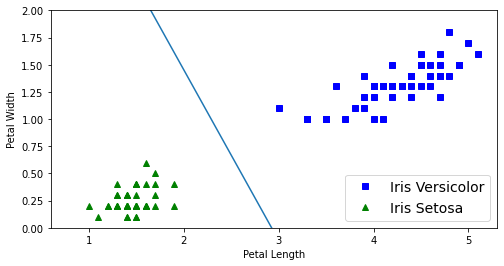

In [8]:
#the coeff property of the SVM has wieghts of each feature. 
#sigmoid(w0*x0 + w1*x1 * b) 
#thus at decision boundary, w0*x0 + w1*x1 * b = 0

b = svm_clf.intercept_[0]
w0 = svm_clf.coef_[0][0]
w1 = svm_clf.coef_[0][1]

left_right = np.array([0.1, 5.2])
up_down = -(w0*left_right + b)/w1

plt.figure(figsize=(8,4))

plt.plot(left_right, up_down)

plt.plot(X[y==1,0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'g^', label="Iris Setosa")

plt.ylabel("Petal Width")
plt.xlabel("Petal Length")
plt.axis([0.6, 5.3, 0, 2])
plt.legend(fontsize=14)

Below we plot move turn the decision boundary plot code into a function and add margin lines. (Note to self: review this derivation. Why is width 1/w1). The boundary we plot is for an unregularizrd model.

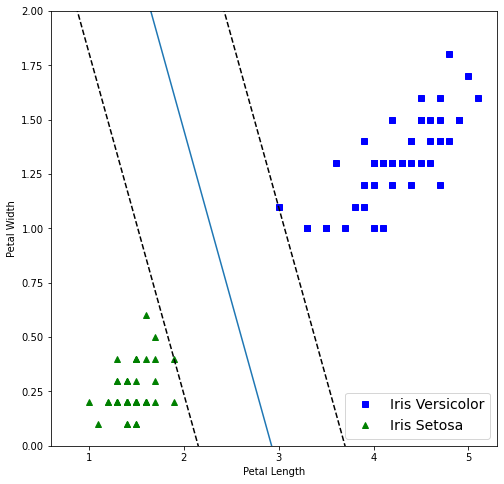

In [9]:
#define boundary plotting function

def plot_decision_boundary(svm_model, xmin, xmax):
  b = svm_model.intercept_[0]
  w = svm_model.coef_[0]
  w0 = w[0]
  w1 = w[1]

  left_right = np.array([xmin, xmax])
  decision_boundary = -(w0*left_right + b)/w1

  margin = 1/w1 #why? review equation
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  #plt.figure(figsize=(8,4))
  plt.plot(left_right, decision_boundary)
  plt.plot(left_right, gutter_up, 'k--')
  plt.plot(left_right, gutter_down, 'k--')

plt.figure(figsize=(8,8))
plt.plot(X[y==1,0], X[y==1, 1], 'bs', label='Iris Versicolor')
plt.plot(X[y==0,0], X[y==0, 1], 'g^', label="Iris Setosa")
plt.ylabel("Petal Width")
plt.xlabel("Petal Length")
plt.axis([0.6, 5.3, 0, 2])
plt.legend(fontsize=14)

#plt.scatter(svm_clf.support_vectors_[:,0], svm_clf.support_vectors_[:1], s=180)

plot_decision_boundary(svm_clf, .6, 5)

In [10]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

Below we show how the SVM model is senstive to feature scales. We train the SVM model on a dataset of 4 points generated below.

In [11]:
#use the following 4 point dataset
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])


In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
Xs_new = std_scaler.fit_transform(Xs)

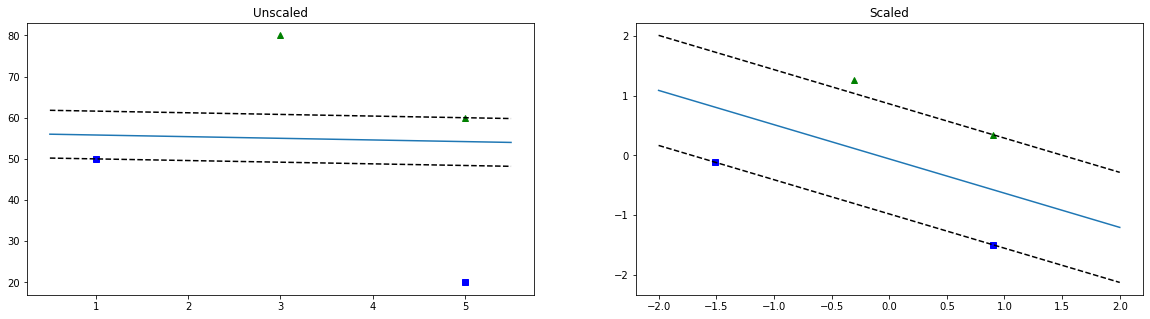

In [13]:
#plot figures side by side
fig, ax = plt.subplots(1,2, figsize=(20,5))

#train and plot
svm_clf.fit(Xs, ys) #this classifier was defined before with C=infinity

#subplot 1
plt.sca(ax[0])
plt.title("Unscaled")
plt.plot(Xs[:,0][ys==0], Xs[:,1][ys==0], 'bs')
plt.plot(Xs[:,0][ys==1], Xs[:,1][ys==1], 'g^')
plot_decision_boundary(svm_clf, 0.5, 5.5)

svm_clf.fit(Xs_new, ys)
#subplot 2
plt.subplot(122)
plt.title("Scaled")
plt.plot(Xs_new[:,0][ys==0], Xs_new[:,1][ys==0], 'bs')
plt.plot(Xs_new[:,0][ys==1], Xs_new[:,1][ys==1], 'g^')
plot_decision_boundary(svm_clf, -2, 2)

In [14]:
Xs_new

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

The petal and manually generated data up to this point have been linearly separable. Next introduce outliers into the petal data set and train two SVM models, one regularized and one unregularized. Plot how the decision boundaries compare. (revise this)


In [15]:
#Theres outliers are labeled setosa

X_outliers = [[4, 1.25], [1.5, .5]]
y_outliers = [0, 0]

In [16]:
#These are coordinates for points labels versicolor. The first outliers coordinates fall into the
#setosa region, making the dataset not linearly separable.

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])


#
Xo0 = np.concatenate((X, X_outliers[:1]), axis=0)
yo0 = np.concatenate((y, y_outliers[:1]), axis=0)

#
Xo1 = np.concatenate((X, X_outliers[1:]), axis=0)
yo1 = np.concatenate((y, y_outliers[1:]), axis=0)

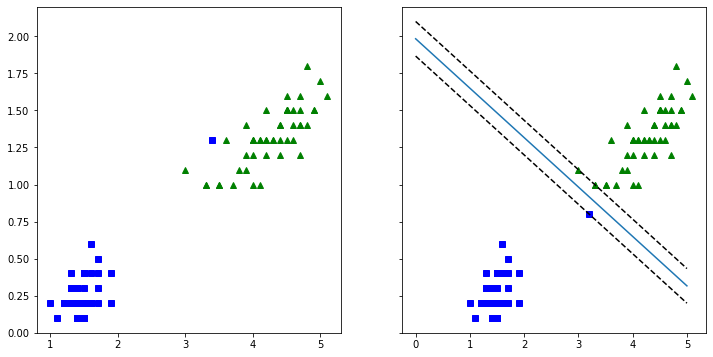

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)

plt.sca(ax[0])

plt.plot(Xo0[yo0==0, 0], Xo0[yo0==0, 1], 'bs')
plt.plot(Xo0[yo0==1, 0], Xo0[yo0==1, 1], 'g^')
#plot_decision_boundary(svm_clf, 0, 5)
########################################################

plt.sca(ax[1])

svm_clf.fit(Xo1, yo1)  #this classifier was defined before with C=infinity

plt.plot(Xo1[yo1==0, 0], Xo1[yo1==0, 1], 'bs')
plt.plot(Xo1[yo1==1, 0], Xo1[yo1==1, 1], 'g^')
plot_decision_boundary(svm_clf, 0, 5)

5/10/22: The above is hard margin classification where no violation can occur. Next task is to train models with soft margin classification and plot thier boundares. Soft margin : lower C hyperparameter to deregularize. Remember its effictevly like reciproca of lambda. Where high lambda -> less over-fitting.